## Q1: What proportion of students who answer this question quickly will pass the class?

Given:
- P(quick answer | pass) = 0.6
- P(quick answer | fail) = 0.3
- P(pass) = 0.9

Applying Bayes' theorem:


$P(pass | quick answer) = \frac{P(quick answer | pass)P(pass)}{P(quick answer)}$


Where:

$P(quick answer) = P(quick answer | pass) P(pass) + P(quick answer | fail) P(fail)$


$P(quick answer) = (0.6 \cdot 0.9) + (0.3 \cdot 0.1) = 0.54 + 0.03 = 0.57$

Together we have:

$P(pass | quick answer) = \frac{0.6 \cdot 0.9}{0.57} = \frac{0.54}{0.57} \approx 0.947$

Thus, approximately 94.7% of students will pass the class if they answer quickly.

## Q2: Bayesian Posterior Distribution

Given:
- Likelihood: $p(x | \theta, n) = \text{Multinomial}(n, \theta)$
- Prior: $p(\theta | \alpha) = \text{Dirichlet}(\alpha)$

The posterior distribution is:
$p(\theta | x, n, \alpha) \propto p(x | \theta, n) p(\theta | \alpha)$

The Dirichlet distribution is the conjugate prior for the multinomial distribution, thus the posterior is also a Dirichlet distribution:

$
p(\theta | x, n, \alpha) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_k + x_k)
$

Where $ x = (x_1, x_2, \ldots, x_k) $ are the observed counts, and $ \alpha = (\alpha_1, \alpha_2, \ldots, \alpha_k) $ are the prior parameters.



## Q3: Visualization of the Dirichlet and Multinomial Distributions

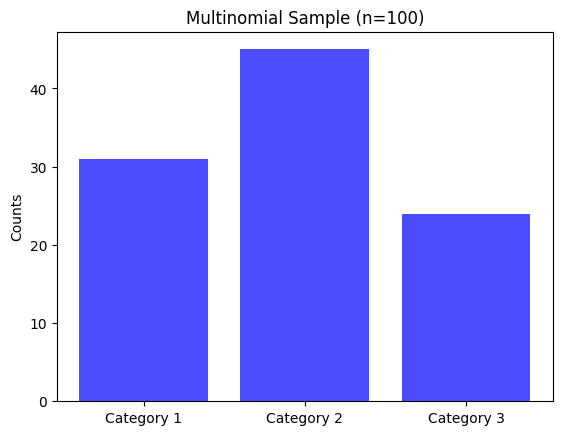

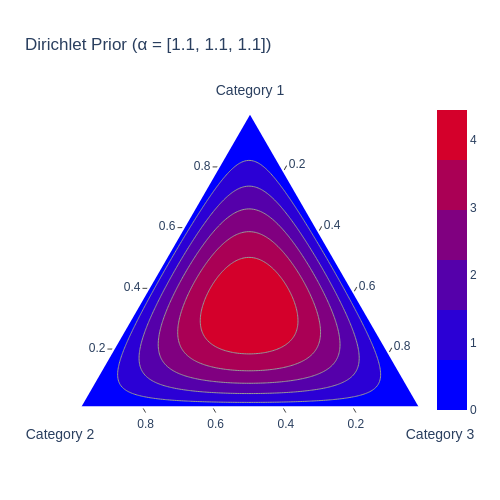

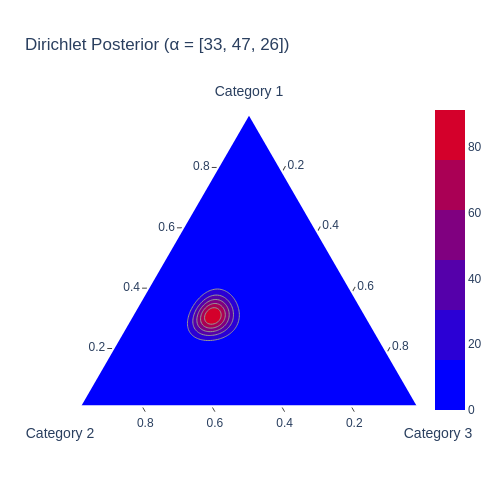

In [2]:
import numpy as np
from scipy.stats import dirichlet, multinomial
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import random

random.seed(888)

# Dirichlet prior parameters and generate multinomial sample
alpha_prior = np.array([2, 2, 2])
dirichlet_prior = dirichlet(alpha=alpha_prior)

# Generate one sample from the Dirichlet prior
theta = dirichlet_prior.rvs(size=1)[0]
n_trials = 100
multinomial_sample = multinomial.rvs(n=n_trials, p=theta)

# Visualize the multinomial sample
categories = ["Category 1", "Category 2", "Category 3"]
plt.bar(categories, multinomial_sample, color="blue", alpha=0.7)
plt.title("Multinomial Sample (n=100)")
plt.ylabel("Counts")
plt.show()

# Update Dirichlet parameters for posterior
alpha_posterior = alpha_prior + multinomial_sample

def create_ternary_plot(alpha, title):
    p1 = np.linspace(0, 1, 100)
    p2 = np.linspace(0, 1, 100)
    p1, p2 = np.meshgrid(p1, p2)
    p3 = 1 - p1 - p2

    # Mask invalid points
    mask = p3 >= 0
    p1, p2, p3 = p1[mask], p2[mask], p3[mask]

    # Stack grid points
    grid_points = np.vstack([p1, p2, p3]).T

    # Evaluate the Dirichlet PDF at each grid point
    dirichlet_densities = dirichlet(alpha=alpha).pdf(grid_points.T)

    # Create ternary contour plot
    fig = ff.create_ternary_contour(
        grid_points.T,
        dirichlet_densities,
        pole_labels=["Category 1", "Category 2", "Category 3"],
        interp_mode="cartesian",
        showscale=True,
    )
    fig.update_layout(title=title)
    fig.show('png')

# Plot the Dirichlet prior
create_ternary_plot(alpha_prior, "Dirichlet Prior (α = [1.1, 1.1, 1.1])")

# Plot the Dirichlet posterior
create_ternary_plot(alpha_posterior, f"Dirichlet Posterior (α = {alpha_posterior.tolist()})")

